<a href="https://colab.research.google.com/github/LoznianuAnamaria/challenges/blob/main/catalunia/Catalunia_Traffic_Accident_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚦 Catalonia Accident [Data](https://market.oceanprotocol.com/asset/did:op:896edf294ab6598b6beaa59e68704284e7b1601282de8bdf56a411919ae567bd) Report

Author: *Anamaria Loznianu*

Email: *anamaria.loznianu@gmail.com*

![](https://drive.google.com/uc?export=view&id=1hoHOVjt1ZtuxPHEUfRCNLB44eQySW4lW)  
Why did the drag racer bring a ladder to the race?

Because they wanted to take their performance to a whole new level! 🏁🪜😄


---


 🚑 Joke aside, this is a report containing a few key findings from Catalonia's roads. 🌟 Then, we're going to zoom in and drill down into the nitty-gritty details extracted from the dataset.

 My purpose is clear: to understand the past, decipher the present, and pave the way for a safer future. Through data-driven exploration, we aim to answer crucial questions about accidents, their causes, and the factors influencing their outcomes.

 So what's really happening on the Catalonia's streets? 🛣️🔍


---


# Key findings

1.   **COVID-19's Effect on Traffic Accidents**: In 2020, a marked decline in accident occurrences was observed, aligning with the period of the COVID-19 pandemic. This downturn in accidents can be largely attributed to the pandemic-induced measures such as lockdowns and travel limitations, which resulted in notably less traffic on the roads. This trend supports a straightforward principle: fewer vehicles in circulation lead to fewer accidents.
2. In 2021 there is a notable change in the number of accidents compared to 2021. This could be due to many factors, one assumption being the **residual effects of the COVID-19 pandemic** that might still influence the number of accidents. Factors like continued remote working, reduced commuting, or changes in public behavior could result in fewer vehicles on the road, thus lowering accident rates.
3. **Motorcycle** riding is popular in Catalonia, yet it appears to be associated with a higher risk of accidents. Within the dataset of **21,161** total accidents, a considerable **15,250** involved light vehicles. Notably, **motorcycles were involved in 8,058 accidents**, and **4,528** of these incidents included both light vehicles and motorcycles. This data points to the importance of enhanced road safety measures and the need for comprehensive education around **motorcycle riding**. It suggests that by improving regulations and increasing awareness about sharing the road with different types of vehicles, there could be a significant impact on reducing accidents and ensuring safer roads for all.
4. Even as vehicle numbers have risen, there has been a significant decline in the frequency of accidents. This trend suggests advancements across several domains, including the advent of more sophisticated automotive technology, the implementation of stricter rules and regulations, and the enhancement of driver education. GG Catalonians! 👍
5. Autopistas (Highways) exhibit the highest average fatality rate per accident, approximately 0.226. Carreteras convencionales (Conventional Roads) closely follow with an average fatality rate of approximately 0.211. It is evident that highways and conventional roads are linked to more severe accidents in terms of fatalities when compared to urban roads and expressways. Several factors could contribute to this, including higher speed limits, extended emergency response times, and varying traffic conditions characteristic of these road types.


---


Now, let's dive deeper into the dataset. Within each cell, you'll discover data and visuals that capture the essence of the dataset.




In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# Upload file from your local machine
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Adjust the file name if necessary

# Load the data
data = pd.read_csv(file_name)

Saving Traffic_Accidents.csv to Traffic_Accidents.csv


# Data Preparation

I observed that certain columns had trailing spaces, causing issues during the analysis. Additionally, I noticed that some values in the 'Kilometer Point' column were providing inaccurate information, so I took steps to clean and prepare the data.

Furthermore, I wanted to extract more valuable information from the date column. As a result, I performed preprocessing to enhance our understanding of the dataset's temporal aspects and of the fatalies of the accidents.


In [28]:
# Data Preparation

# Iterate through each column name and remove the trailing space (if present)
new_column_names = []
for column_name in data.columns:
    if column_name.endswith(' '):
        new_column_name = column_name[:-1]  # Remove the last character (space)
    else:
        new_column_name = column_name  # Keep the original name
    new_column_names.append(new_column_name)

data.columns = new_column_names

# Cleanup 'Kilometer point' values
placeholders = [999, 9999, 999999]

# Replace the placeholders with NaN
data['Kilometer Point'] = data['Kilometer Point'].replace(placeholders, np.nan)

## Cleanup Date field
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

## Extracting additional time features
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.weekday

# Creating a combined fatalities and serious injuries column for severity analysis
data['Total Casualties'] = data['Fatalties'] + data['Serious Injuries']

# Checking the data after modifications
data.head()

,Year,Area,Date,Road,Kilometer Point,Municipality Name,County Name,Province Name,Fatalties,Serious Injuries,...,Road's Altimetric Layout,Wind Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type,Month,Weekday,Total Casualties
0,2010,Zona urbana,2010-01-25,SE,NaN,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,NaN,"Calma, vent molt suau",Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij,1,0,1
1,2010,Carretera,2010-10-31,N-240,99.9,LLEIDA,Segria,Lleida,0,1,...,Pla,"Calma, vent molt suau",CapDeSetmana,1.00,Nit,Sortida de la calcada sense especificar,dg,10,6,1
2,2010,Carretera,2010-05-17,N-II,708.7,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Rampa o pendent,"Calma, vent molt suau",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij,5,0,1
3,2010,Zona urbana,2010-08-21,SE,NaN,BARCELONA,Barcelones,Barcelona,0,2,...,NaN,"Calma, vent molt suau",CapDeSetmana,22.30,Nit,Col.lisió de vehicles en marxa,dis,8,5,2
4,2010,Zona urbana,2010-05-07,SE,NaN,BADALONA,Barcelones,Barcelona,0,1,...,NaN,"Calma, vent molt suau",CapDeSetmana,17.45,Tarda,Bolcada a la calcada,div,5,4,1


# General Trends
Overall trends in traffic accidents, fatalities, and serious injuries from 2010-2021

It's clearly visible in the visuals down below that the trend of accidents and of fatalities is in a visible decline, with a notable dip during the COVID-19 pandemic

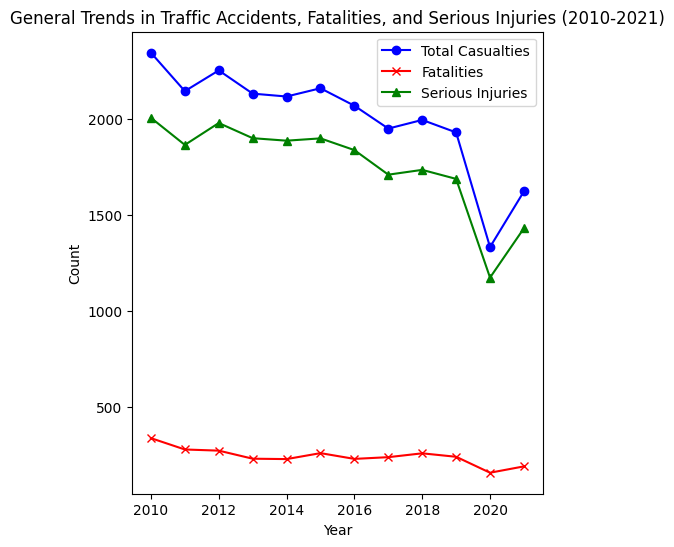

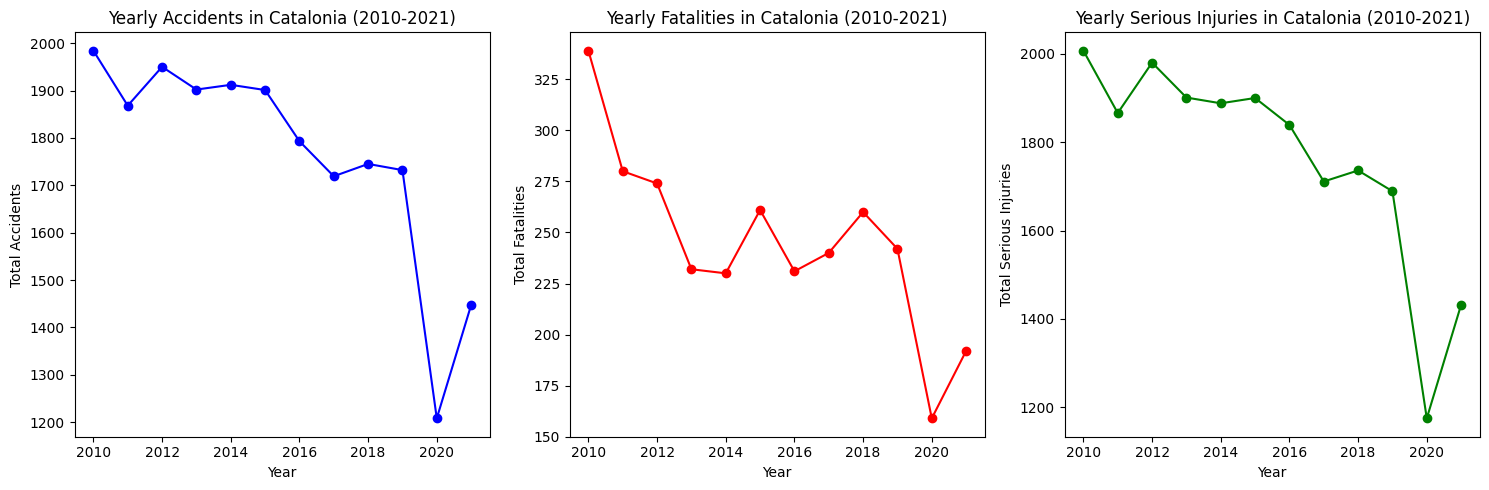

In [44]:
# General Trends - Overall trends in traffic accidents, fatalities, and serious injuries from 2010-2021
general_trends = data.groupby('Year').agg({
    'Total Casualties': ['sum', 'mean'],
    'Fatalties': ['sum', 'mean'],
    'Serious Injuries': ['sum', 'mean']
})

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
general_trends['Total Casualties']['sum'].plot(kind='line', marker='o', color='blue', label='Total Casualties')
general_trends['Fatalties']['sum'].plot(kind='line', marker='x', color='red', label='Fatalities')
general_trends['Serious Injuries']['sum'].plot(kind='line', marker='^', color='green', label='Serious Injuries')
plt.title('General Trends in Traffic Accidents, Fatalities, and Serious Injuries (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()


###### Group data by year
yearly_grouped = data.groupby('Year')

# Calculating total accidents, fatalities, and serious injuries per year
yearly_accidents = yearly_grouped.size()
yearly_fatalities = yearly_grouped['Fatalties'].sum()
yearly_serious_injuries = yearly_grouped['Serious Injuries'].sum()

# Visualization
plt.figure(figsize=(15, 5))

# Total Accidents per Year
plt.subplot(1, 3, 1)
yearly_accidents.plot(kind='line', marker='o', color='blue')
plt.title('Yearly Accidents in Catalonia (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Total Accidents')

# Total Fatalities per Year
plt.subplot(1, 3, 2)
yearly_fatalities.plot(kind='line', marker='o', color='red')
plt.title('Yearly Fatalities in Catalonia (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')

# Total Serious Injuries per Year
plt.subplot(1, 3, 3)
yearly_serious_injuries.plot(kind='line', marker='o', color='green')
plt.title('Yearly Serious Injuries in Catalonia (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Total Serious Injuries')

plt.tight_layout()
plt.show()

general_trends_data = {
    "yearly_accidents": yearly_accidents,
    "yearly_fatalities": yearly_fatalities,
    "yearly_serious_injuries": yearly_serious_injuries
}

# Accident Characteristics

Common characteristics in severe accidents


## Top Provinces with Most Accidents:

1. Barcelona: 12,982 accidents
2. Girona: 3,054 accidents
3. Tarragona: 2,874 accidents
4. Lleida: 2,251 accidents

## Accident Area Distribution:

1. Urban Zones: 11,542 accidents
2. Highways: 9,619 accidents

## Common Road Types for Accidents:

1. Urban Roads (including streets and residential roads)
2. Conventional Highways
3. Others (includes various smaller road types)


## Most Frequent Types of Accidents:

1. Collision of moving vehicles
2. Pedestrian accidents
3. Vehicles leaving the roadway
4. Vehicle rollovers
5. Collision with road obstacles

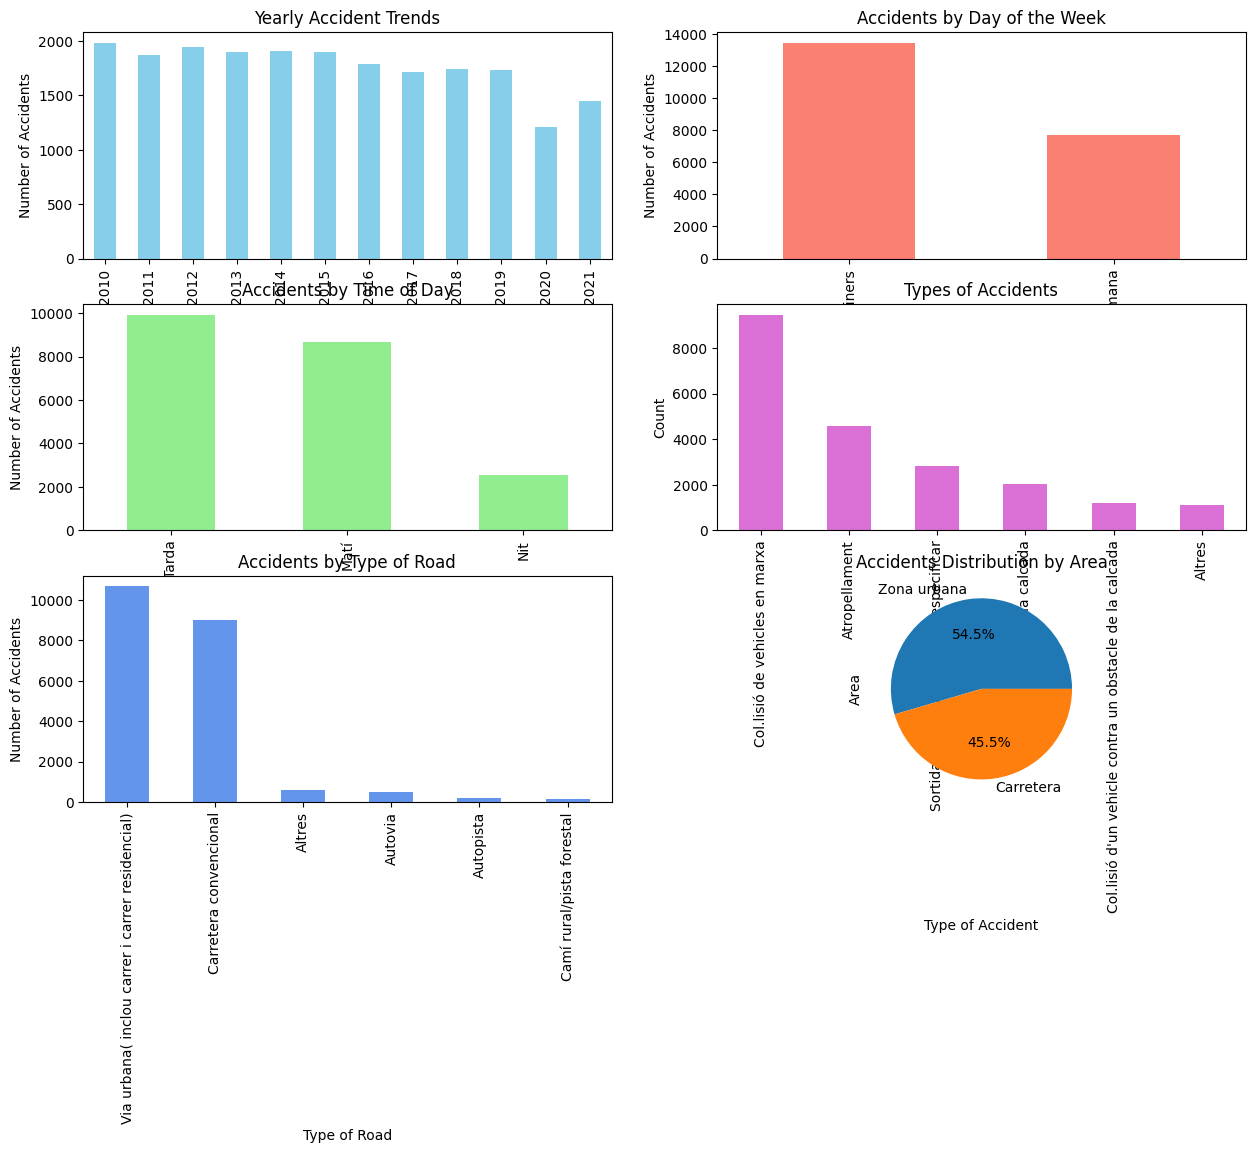

In [58]:
#  Accident Characteristics
accident_types = data['Type of Accident'].value_counts()
road_types = data['Type of Road'].value_counts()

# Yearly trends
yearly_trends = data['Year'].value_counts().sort_index()

# Day and Time Patterns
day_trends = data['Day of the Week Grouping'].value_counts()
time_trends = data['Time of Day Grouping'].value_counts()

# Geographical Insights
area_distribution = data['Area'].value_counts()
province_distribution = data['Province Name'].value_counts()

# Visualization
plt.figure(figsize=(15, 10))

# Yearly Trends
plt.subplot(3, 2, 1)
yearly_trends.plot(kind='bar', color='skyblue')
plt.title('Yearly Accident Trends')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

# Day Trends
plt.subplot(3, 2, 2)
day_trends.plot(kind='bar', color='salmon')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

# Time Trends
plt.subplot(3, 2, 3)
time_trends.plot(kind='bar', color='lightgreen')
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')

# Accident Types
plt.subplot(3, 2, 4)
accident_types.plot(kind='bar', color='orchid')
plt.title('Types of Accidents')
plt.xlabel('Type of Accident')
plt.ylabel('Count')

# Road Types
plt.subplot(3, 2, 5)
road_types.plot(kind='bar', color='cornflowerblue')
plt.title('Accidents by Type of Road')
plt.xlabel('Type of Road')
plt.ylabel('Number of Accidents')

# Area Distribution
plt.subplot(3, 2, 6)
area_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Accidents Distribution by Area')

# plt.tight_layout()
plt.show()

# Display top 5 provinces with most accidents
top_provinces = province_distribution.head(5)


# Severe Accidents Characteristics  


## Time of day:
1. Tarda - 9935
2. Matí - 8661
3. Nit- 2565

## Type of road:
1. Via urbana( inclou carrer i carrer residencial)- 10676
2. Carretera convencional - 9019
3. Altres - 579
4. Autovia - 491
5. Autopista - 221
6. Camí rural/pista forestal - 175

(Tarda    9935
 Matí     8661
 Nit      2565
 Name: Time of Day Grouping, dtype: int64,
 Via urbana( inclou carrer i carrer residencial)    10676
 Carretera convencional                              9019
 Altres                                               579
 Autovia                                              491
 Autopista                                            221
 Camí rural/pista forestal                            175
 Name: Type of Road, dtype: int64)

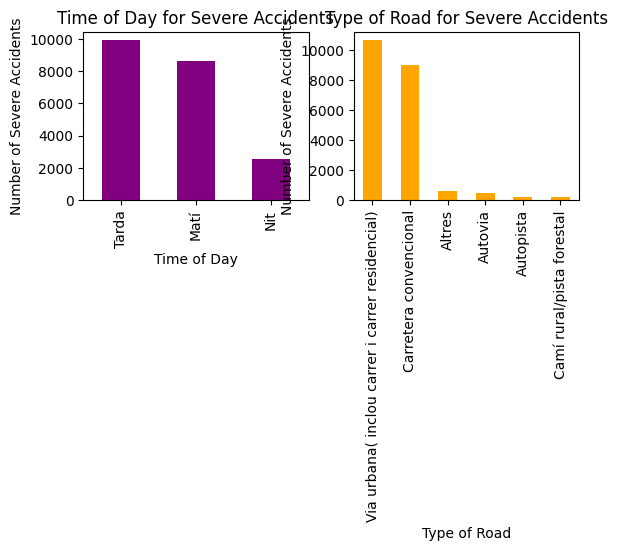

In [84]:
# Filtering severe accidents
severe_accidents = data[data['Total Casualties'] > 0]
severe_time_of_day = severe_accidents['Time of Day Grouping'].value_counts()
severe_type_of_road = severe_accidents['Type of Road'].value_counts()

plt.subplot(2, 2, 3)
severe_time_of_day.plot(kind='bar', color='purple')
plt.title('Time of Day for Severe Accidents')
plt.xlabel('Time of Day')
plt.ylabel('Number of Severe Accidents')

plt.subplot(2, 2, 4)
severe_type_of_road.plot(kind='bar', color='orange')
plt.title('Type of Road for Severe Accidents')
plt.xlabel('Type of Road')
plt.ylabel('Number of Severe Accidents')

severe_time_of_day, severe_type_of_road

# Geographical Insights

High incidence areas and correlation with population density/road network characteristics.

## Top 10 Municipalities with Highest Incidence of Traffic Accidents:

1. Barcelona: 2,750 accidents
2. Terrassa: 571 accidents
3. Sabadell: 536 accidents
4. Lleida: 514 accidents
5. Hospitalet de Llobregat: 392 accidents
6. Tarragona: 388 accidents
7. Badalona: 381 accidents
8. Girona: 330 accidents
9. Mataro: 304 accidents
10. Reus: 302 accidents


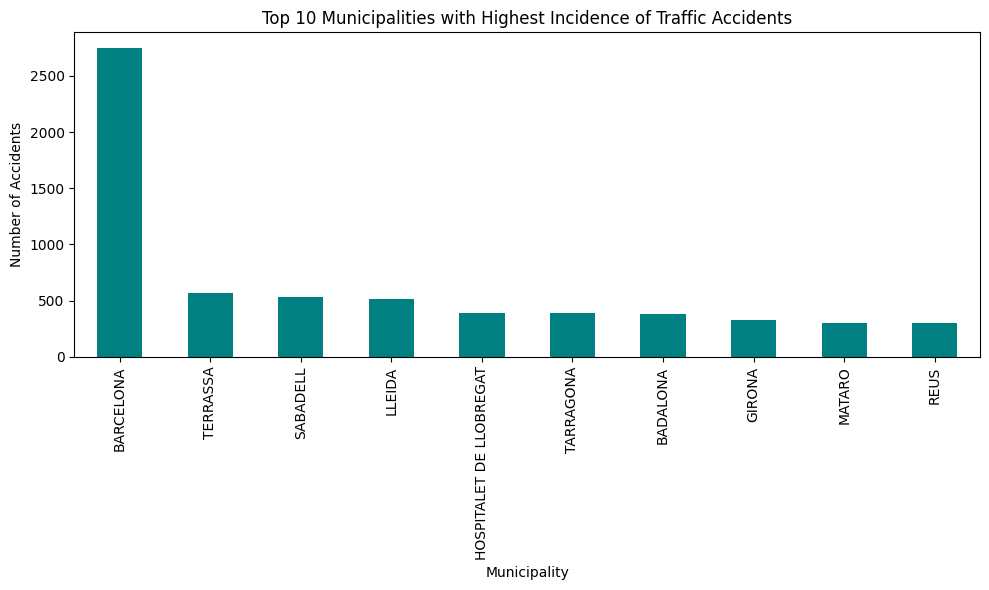

BARCELONA                  2750
TERRASSA                    571
SABADELL                    536
LLEIDA                      514
HOSPITALET DE LLOBREGAT     392
TARRAGONA                   388
BADALONA                    381
GIRONA                      330
MATARO                      304
REUS                        302
Name: Municipality Name, dtype: int64

In [85]:
# Geographical Insights
high_incidence_areas = data['Municipality Name'].value_counts().head(10)
high_incidence_areas

plt.figure(figsize=(10, 6))
high_incidence_areas.plot(kind='bar', color='teal')
plt.title('Top 10 Municipalities with Highest Incidence of Traffic Accidents')
plt.xlabel('Municipality')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

high_incidence_areas

# Yearly Trends
Changes in traffic accident patterns from 2010 to 2021.


## Yearly Accidents:
There is a general decrease in the total number of traffic accidents over the years. A significant drop is observed in 2020, which could be attributed to reduced travel during the COVID-19 pandemic.

## Total Accidents Per Year:
The number of accidents peaked in 2010 with 1,984 incidents and gradually decreased to 1,447 in 2021.



---


## Yearly Fatalities:
Fatalities from traffic accidents show a decreasing trend over the years, with fluctuations. The year 2020 again shows a notable decrease.

## Total Fatalities Per Year:
The highest number of fatalities was in 2010, with 339 deaths, which decreased to 192 in 2021. The year 2020 showed a significant drop, likely influenced by reduced traffic during the pandemic.


---


## Yearly Serious Injuries:
The trend in serious injuries parallels that of total accidents, with a decrease over the years, especially noticeable in 2020.
Insights
The data suggests effective measures might have been implemented over the years, contributing to the decrease in accidents, fatalities, and serious injuries.
The pandemic-related restrictions in 2020 are a likely factor in the significant drop in all three metrics during that year.

## Total Serious Injuries Per Year:
There were 2,007 serious injuries reported in 2010, decreasing over the years to 1,432 in 2021.

----

These trends suggest that while the number of traffic accidents, fatalities, and serious injuries have generally decreased over the years, they still represent a significant concern. The sharp drop in 2020 across all categories indicates the impact of external factors like the pandemic, which likely reduced traffic volume and mobility.

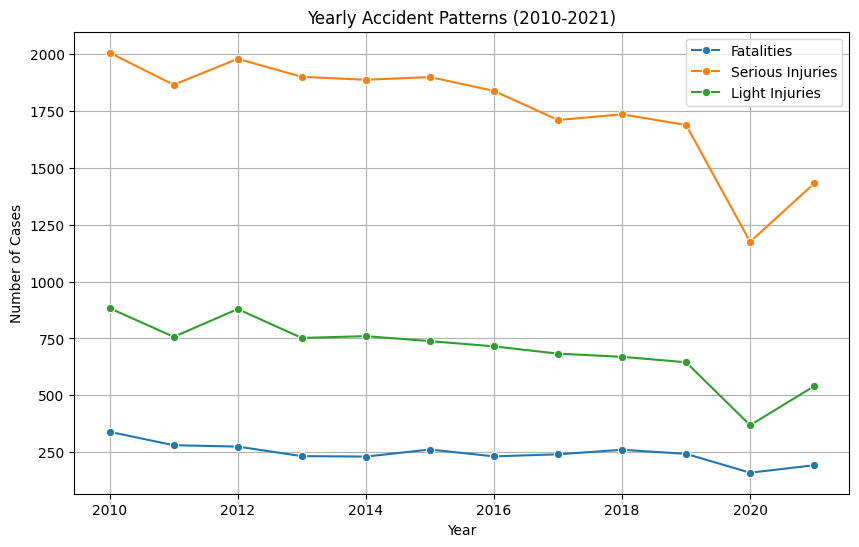

In [86]:
# Yearly Trends
yearly_accident_patterns = data.groupby('Year').agg({'Fatalties': 'sum', 'Serious Injuries': 'sum', 'Light Injuries': 'sum'}).reset_index()

# Visualization for Yearly Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_accident_patterns, x='Year', y='Fatalties', marker='o', label='Fatalities')
sns.lineplot(data=yearly_accident_patterns, x='Year', y='Serious Injuries', marker='o', label='Serious Injuries')
sns.lineplot(data=yearly_accident_patterns, x='Year', y='Light Injuries', marker='o', label='Light Injuries')
plt.title('Yearly Accident Patterns (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

# Day and Time Patterns

Accident occurrence by days of the week and times of day

##  Day of the Week:
1. "Feiners" (Weekdays): 13,441 accidents
2. "CapDeSetmana" (Weekends): 7,720 accidents

Despite there being more accidents on weekdays than weekends, the statistical analysis reveals that on an average weekday, there are typically fewer accidents compared to a typical weekend day.


## Time of Day:

1. "Tarda" (Afternoon): 9,935 accidents
2. "Matí" (Morning): 8,661 accidents
3. "Nit" (Night): 2,565 accidents
The afternoon (Tarda) is the time with the highest number of accidents, followed by morning (Matí). Nighttime (Nit) has the fewest accidents.

It appears that traffic accidents occur more frequently on Fridays, Sundays, and Saturdays, with Fridays having the highest accident rate. This pattern is likely attributed to increased traffic volumes resulting from daily commutes and work-related travel. Additionally, the afternoon period registers the highest number of accidents, possibly due to rush hour traffic and the potential for reduced alertness or fatigue after a day's work.

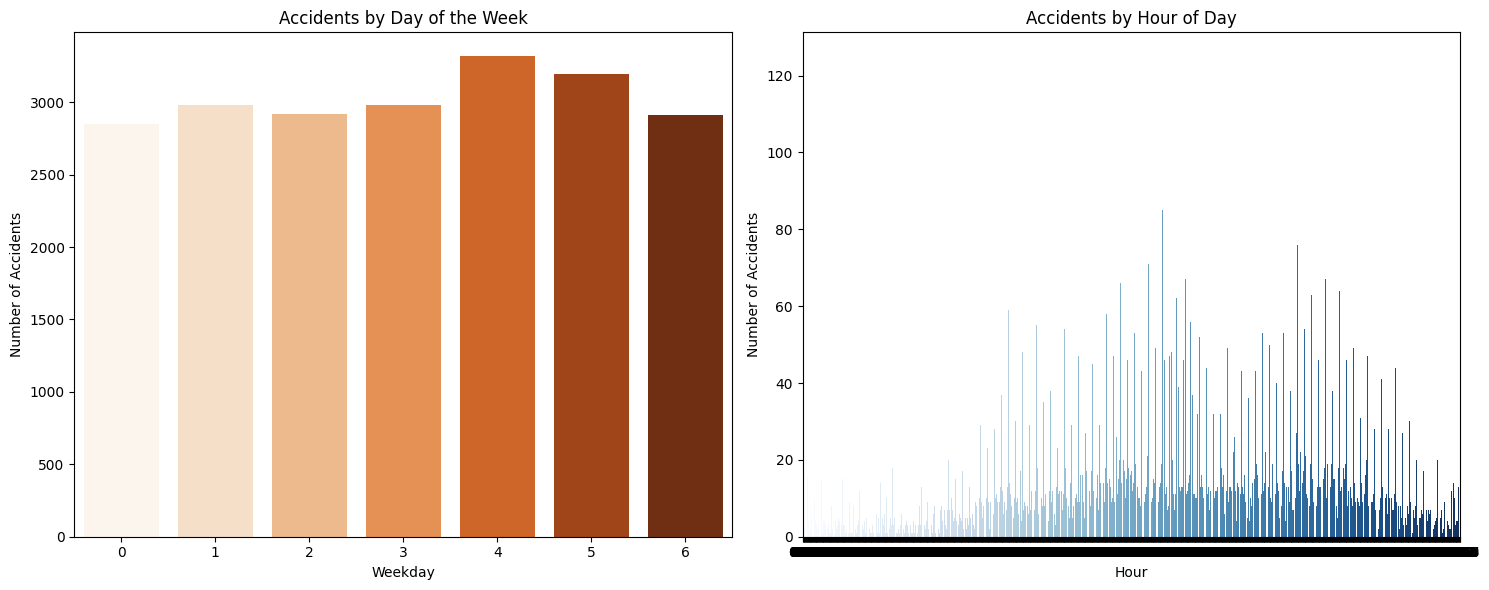

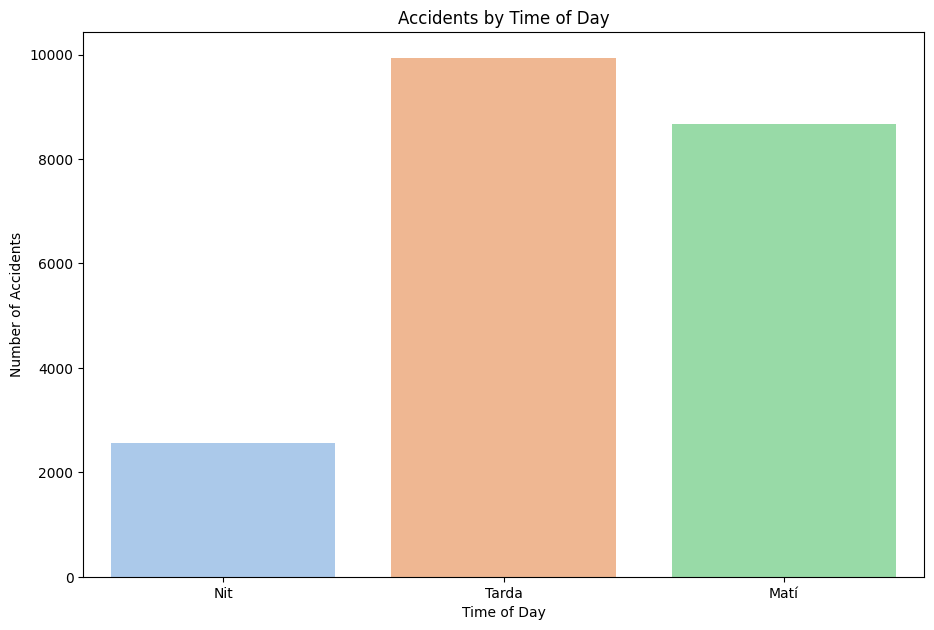

In [99]:
# Set a common figure size
plt.figure(figsize=(15, 6))

# Day of the Week Patterns
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Weekday', palette='Oranges', hue='Weekday', legend=False)
plt.title('Accidents by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Accidents')

# Accidents by Hour of Day
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Hour of Day', palette='Blues', hue='Hour of Day', legend=False)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')

# Ensure proper spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Separate analysis for weekdays and weekends
weekday_accidents = data[data['Weekday'] < 5]
weekend_accidents = data[data['Weekday'] >= 5]

plt.figure(figsize=(18, 12))

# Time of Day Patterns
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='Time of Day Grouping', palette='pastel', hue='Time of Day Grouping', legend=False)
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')

# Ensure proper spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Environmental Impact


## Accidents by Weather Conditions:
1. "Calma, vent molt suau" (Calm, very light wind): 20,762 accidents
2. "Vent moderat" (Moderate wind): 310 accidents
3. "Vent fort" (Strong wind): 83 accidents
The majority of accidents occur during calm weather conditions, suggesting that other factors than weather play a more significant role in these incidents.

## Accidents by Road Surface Conditions:
1. "Sec i net" (Dry and clean): 20,078 accidents
2. "Mullat" (Wet): 793 accidents
3. "Relliscós" (Slippery): 140 accidents
4. "Inundat" (Flooded): 114 accidents

The data shows that most accidents occur on dry and clean road surfaces. This again indicates that factors other than adverse road conditions are more influential in the occurrence of accidents.
These findings suggest that while weather and road conditions do have an impact on traffic accidents, the majority occur under calm weather conditions and on dry, clean roads. It's important to consider that driving behavior, traffic volume, and other environmental factors might be more significant contributors to traffic accidents.



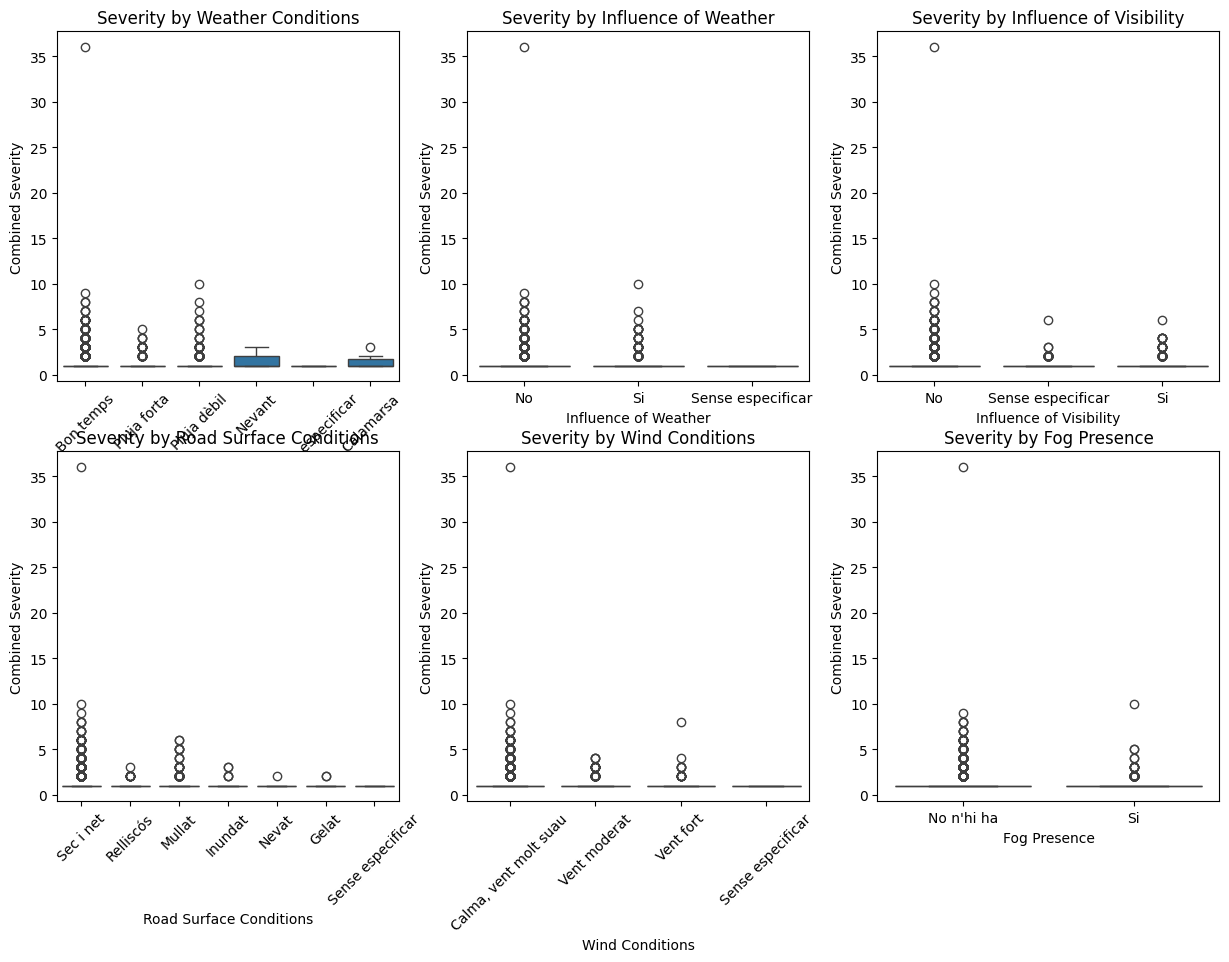

In [100]:
# Environmental Impact

weather_related_columns = [
    'Weather Conditions', 'Influence of Weather', 'Influence of Visibility',
    'Road Surface Conditions', 'Wind Conditions', 'Fog Presence',
    'Fatalties', 'Serious Injuries'
]
weather_related_data = data[weather_related_columns].copy()

# Checking for missing values in these columns
missing_values_weather = weather_related_data.isnull().sum()

# Overview of the unique values in each of the weather-related columns (excluding fatality and injury columns)
unique_values_weather = {col: weather_related_data[col].unique() for col in weather_related_columns[:-2]}

missing_values_weather, unique_values_weather

# Analyzing correlation between weather conditions and accident severity
# We will create a combined severity score (sum of fatalities and serious injuries)
weather_related_data['Combined Severity'] = weather_related_data['Fatalties'] + weather_related_data['Serious Injuries']

# Visualization setup
plt.figure(figsize=(15, 10))

# Subplots for different weather-related factors
plt.subplot(2, 3, 1)
sns.boxplot(x='Weather Conditions', y='Combined Severity', data=weather_related_data)
plt.xticks(rotation=45)
plt.title('Severity by Weather Conditions')

plt.subplot(2, 3, 2)
sns.boxplot(x='Influence of Weather', y='Combined Severity', data=weather_related_data)
plt.title('Severity by Influence of Weather')

plt.subplot(2, 3, 3)
sns.boxplot(x='Influence of Visibility', y='Combined Severity', data=weather_related_data)
plt.title('Severity by Influence of Visibility')

plt.subplot(2, 3, 4)
sns.boxplot(x='Road Surface Conditions', y='Combined Severity', data=weather_related_data)
plt.xticks(rotation=45)
plt.title('Severity by Road Surface Conditions')

plt.subplot(2, 3, 5)
sns.boxplot(x='Wind Conditions', y='Combined Severity', data=weather_related_data)
plt.xticks(rotation=45)
plt.title('Severity by Wind Conditions')

plt.subplot(2, 3, 6)
sns.boxplot(x='Fog Presence', y='Combined Severity', data=weather_related_data)
plt.title('Severity by Fog Presence')

# plt.tight_layout()
plt.show()


# Road and Traffic Features

## Accidents by Type of Road:
1. Urban Roads (including streets and residential roads): 10,676 accidents
2. Conventional Highways: 9,019 accidents
3. Others (including various smaller road types): 579 accidents
4. Motorways (Autovia): 491 accidents
5. Expressways (Autopista): 221 accidents
6. Rural Roads/Forest Tracks: 175 accidents

The data indicates a higher number of accidents on urban roads and conventional highways, likely due to higher traffic volumes and intersections in these areas.


## Accidents by Road Ownership:
1. Autonomous Roads: 3,683 accidents
2. State Roads: 2,269 accidents
3. Provincial Roads: 1,672 accidents
4. Municipal Roads: 1,463 accidents
5. Others: 1,348 accidents

The distribution of accidents across different road ownerships suggests that a significant number of accidents occur on roads managed at various governmental levels, with autonomous roads seeing the highest number of accidents.
These insights indicate that road type and ownership are significant factors in traffic accidents, with urban areas and conventional highways experiencing the most incidents. This can be attributed to higher traffic density, more complex road layouts, and potentially more frequent risky driving behaviors in these areas.



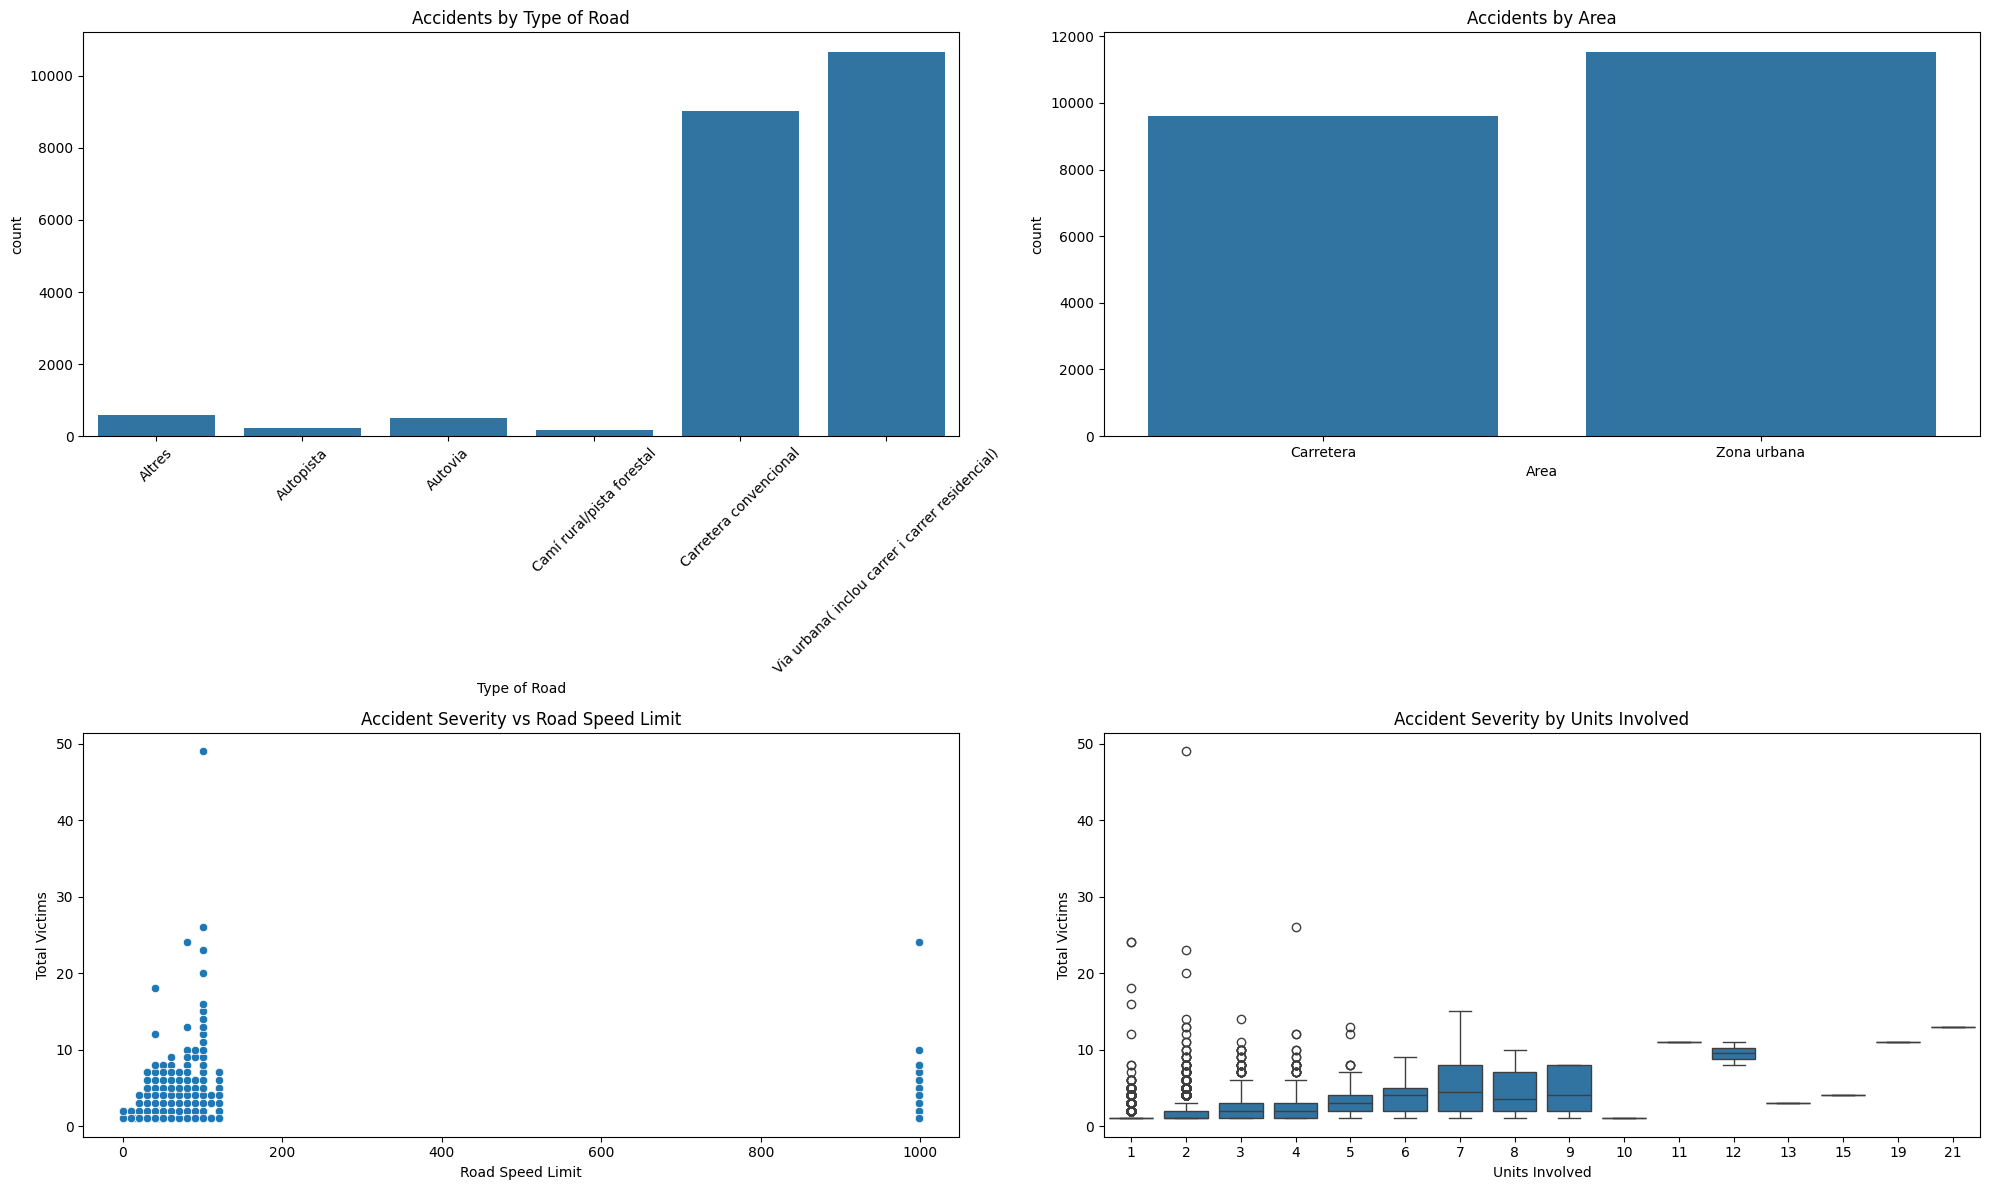

The road with the most accidents is 'SE' with 11016 accidents.


,Year,Area,Date,Road,Kilometer Point,Municipality Name,County Name,Province Name,Fatalties,Serious Injuries,...,Road's Altimetric Layout,Wind Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type,Month,Weekday,Total Casualties
0,2010,Zona urbana,2010-01-25,SE,NaN,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,NaN,"Calma, vent molt suau",Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij,1,0,1
3,2010,Zona urbana,2010-08-21,SE,NaN,BARCELONA,Barcelones,Barcelona,0,2,...,NaN,"Calma, vent molt suau",CapDeSetmana,22.30,Nit,Col.lisió de vehicles en marxa,dis,8,5,2
4,2010,Zona urbana,2010-05-07,SE,NaN,BADALONA,Barcelones,Barcelona,0,1,...,NaN,"Calma, vent molt suau",CapDeSetmana,17.45,Tarda,Bolcada a la calcada,div,5,4,1
5,2010,Carretera,2010-08-16,SE,NaN,SANT CARLES DE LA RAPITA,Montsia,Tarragona,0,1,...,Rampa o pendent,"Calma, vent molt suau",Feiners,14.57,Tarda,Col.lisió de vehicles en marxa,dill-dij,8,0,1
6,2010,Zona urbana,2010-01-13,SE,NaN,BARCELONA,Barcelones,Barcelona,0,1,...,NaN,"Calma, vent molt suau",Feiners,20.54,Tarda,Col.lisió de vehicles en marxa,dill-dij,1,2,1


In [101]:
# Road and Traffic Features
road_traffic_columns = [
    'Road Speed Limit', 'Type of Road', 'Traffic Regulation and Priority',
    'Units Involved', 'Road', 'Area', 'Total Victims'
]

# Checking if these columns are present in the dataset
road_traffic_columns_present = [col for col in road_traffic_columns if col in data.columns]

# Displaying the first few rows of these columns to understand their data
road_traffic_data_sample = data[road_traffic_columns_present].head()

road_traffic_columns_present, road_traffic_data_sample

# Converting 'Type of Road' and 'Area' to categorical for better visualization
road_traffic_data = data[road_traffic_columns_present].copy()
road_traffic_data['Type of Road'] = road_traffic_data['Type of Road'].astype('category')
road_traffic_data['Area'] = road_traffic_data['Area'].astype('category')

# Visualization
plt.figure(figsize=(20, 12))

# Subplots for different road and traffic features
plt.subplot(2, 2, 1)
sns.countplot(x='Type of Road', data=road_traffic_data)
plt.xticks(rotation=45)
plt.title('Accidents by Type of Road')

plt.subplot(2, 2, 2)
sns.countplot(x='Area', data=road_traffic_data)
plt.title('Accidents by Area')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Road Speed Limit', y='Total Victims', data=road_traffic_data)
plt.title('Accident Severity vs Road Speed Limit')

plt.subplot(2, 2, 4)
sns.boxplot(x='Units Involved', y='Total Victims', data=road_traffic_data)
plt.title('Accident Severity by Units Involved')

plt.tight_layout()
plt.show()


# Find the road with the most accidents
most_dangerous_road = data['Road'].value_counts().idxmax()
accidents_on_most_dangerous_road = data['Road'].value_counts().max()

# Print the road with the most accidents
print(f"The road with the most accidents is '{most_dangerous_road}' with {accidents_on_most_dangerous_road} accidents.")

most_dangerous_road_data = data[data['Road'] == most_dangerous_road]

# Displaying the first few rows of the filtered data to examine its specifications
most_dangerous_road_data.head()

# Vehicle type and Accident Severity


## Light Vehicles:

1. For serious accidents, 15,250 light vehicles were involved.
2. For fatal accidents, 2,792 light vehicles were involved.

## Motorcycles:

1. In serious accidents, 7,265 motorcycles were involved.
2. In fatal accidents, 793 motorcycles were involved.


This data suggests that motorcycles are significantly involved in traffic accidents, with a considerable number of these incidents being serious. The relatively high number of serious accidents could be indicative of the vulnerability of motorcycles compared to enclosed vehicles. Additionally, the proportion of fatal accidents, although smaller than serious ones, is still noteworthy and highlights the potential risks associated with motorcycle riding.

From this data, it can be inferred that there is a need for focused safety measures and awareness campaigns targeting motorcycle riders, aimed at reducing the incidence and severity of these accidents. This could include promoting the use of protective gear, enhancing rider training, and improving road conditions and traffic management to better accommodate motorcycles



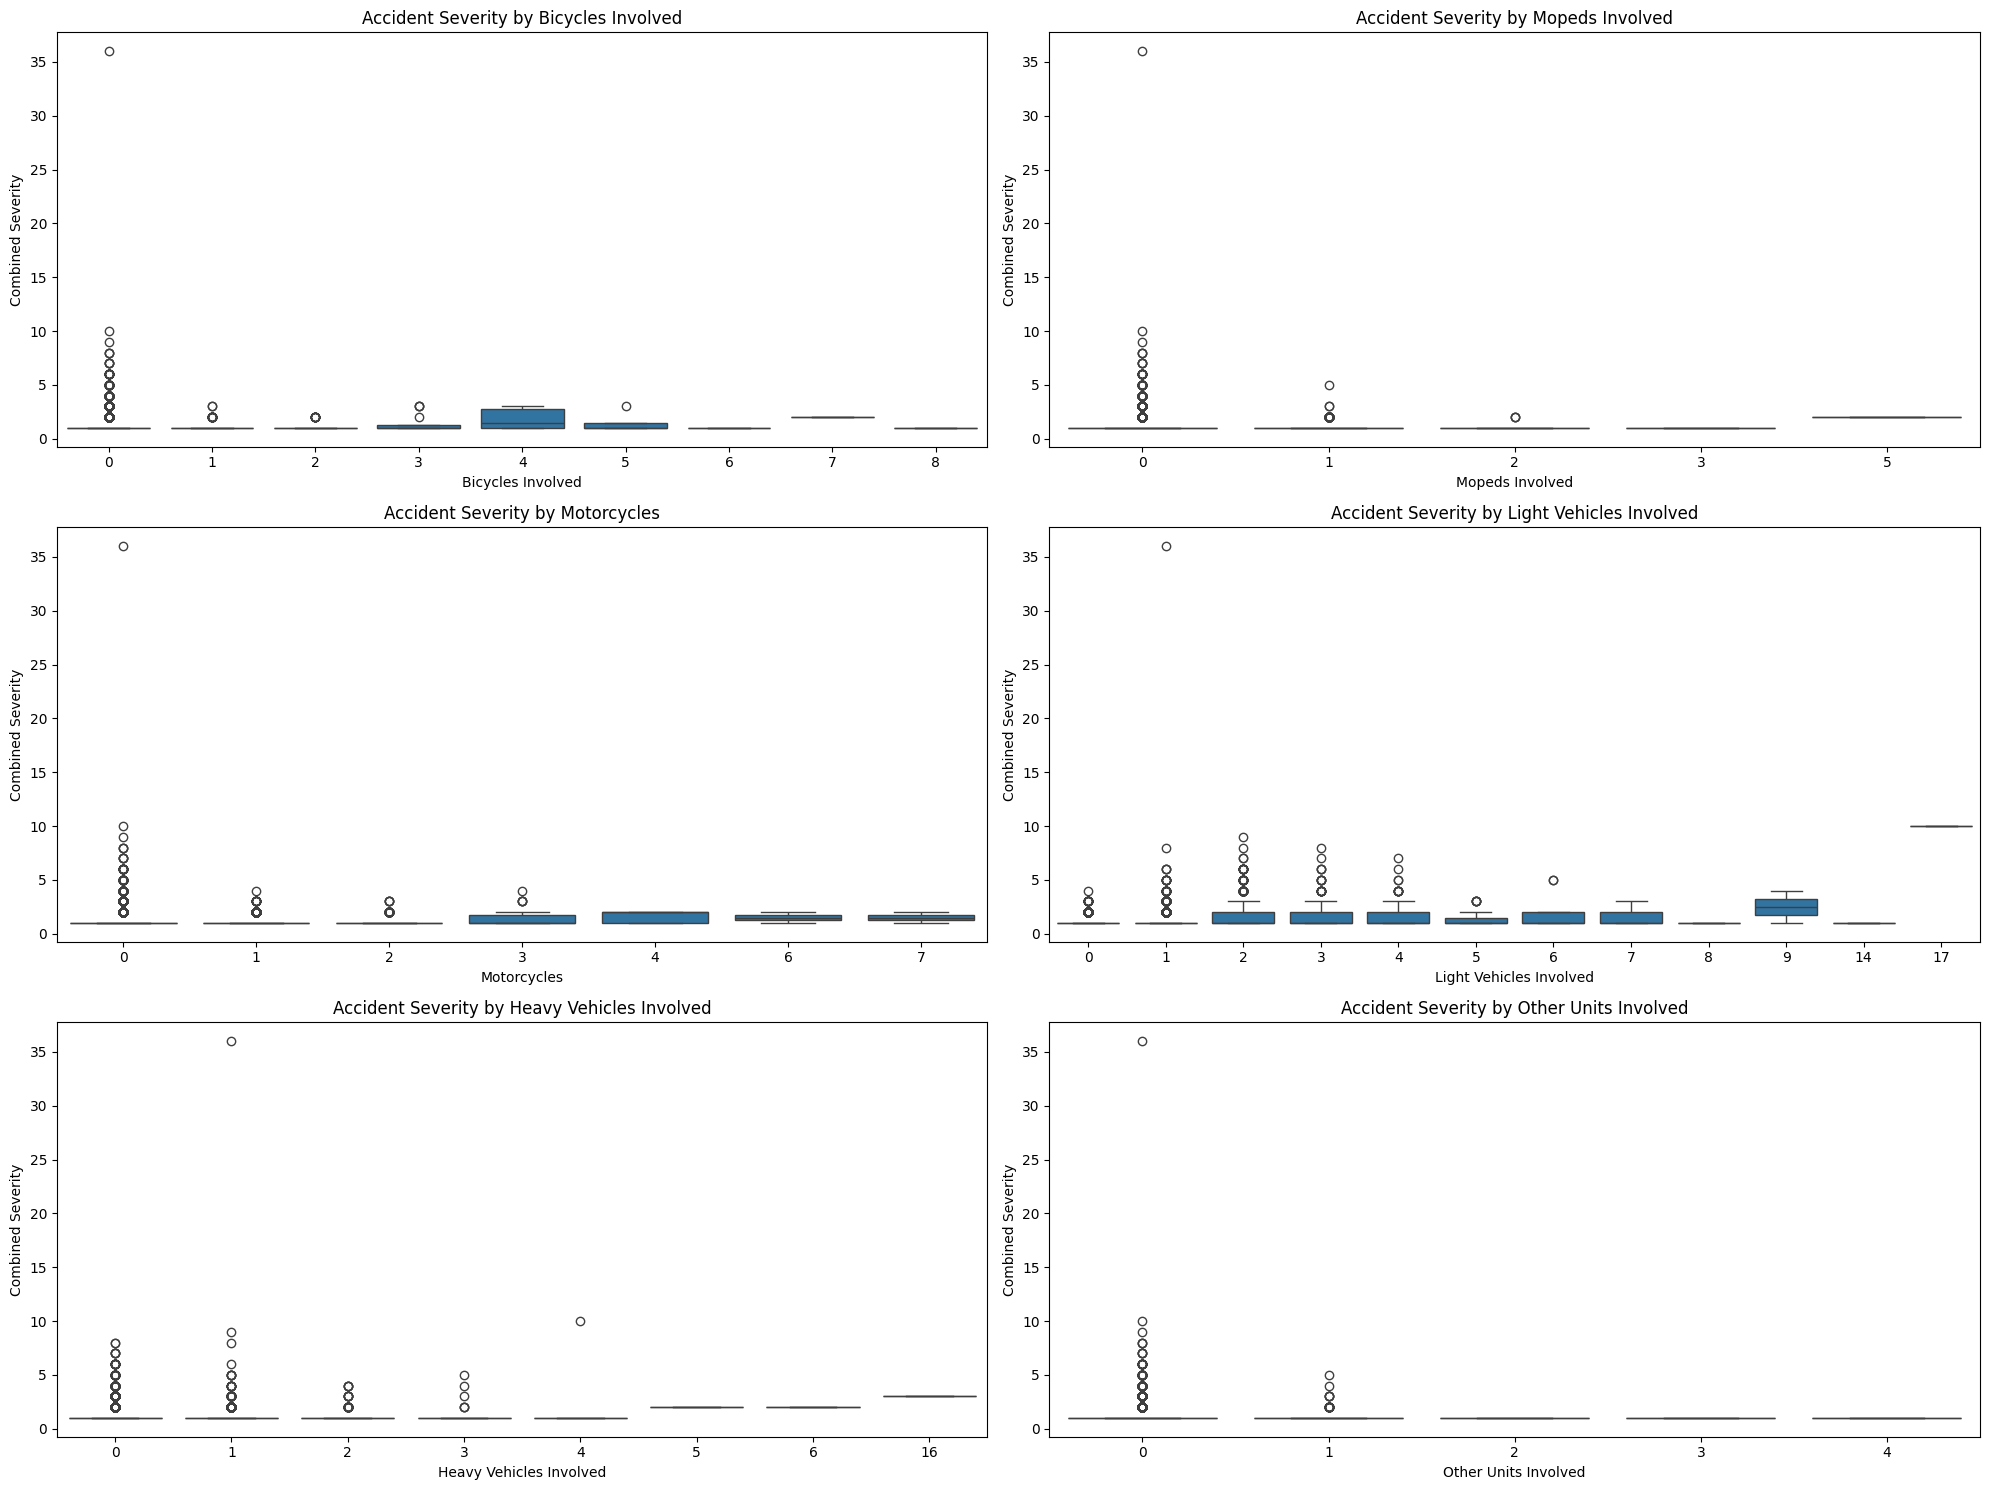

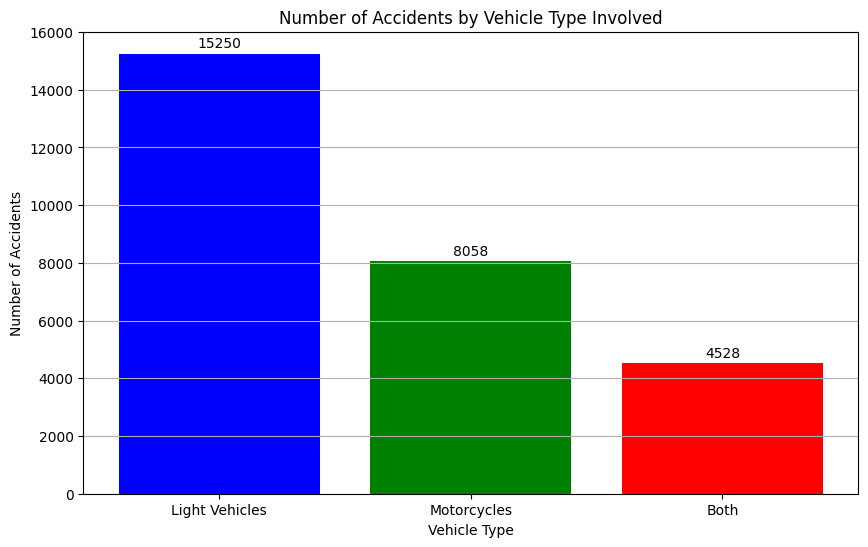

In [104]:
# Vehicle type and Accident Severity

# Relevant columns for vehicle types and accident severity analysis
vehicle_type_columns = [
    'Bicycles Involved', 'Mopeds Involved', 'Motorcycles', 'Light Vehicles Involved',
    'Heavy Vehicles Involved', 'Other Units Involved', 'Unspecified Units Involved',
    'Fatalties', 'Serious Injuries', 'Total Victims'
]

# Checking if these columns are present in the dataset
vehicle_type_columns_present = [col for col in vehicle_type_columns if col in data.columns]

# Displaying the first few rows of these columns to understand their data
vehicle_type_data_sample = data[vehicle_type_columns_present].head()

vehicle_type_columns_present, vehicle_type_data_sample

# Preparing the data for analysis
# Combining severity into a single metric for simplicity
vehicle_type_data = data[vehicle_type_columns_present].copy()
vehicle_type_data['Combined Severity'] = vehicle_type_data['Fatalties'] + vehicle_type_data['Serious Injuries']

# Visualization
plt.figure(figsize=(20, 15))

# Subplots for different vehicle types
vehicle_types = ['Bicycles Involved', 'Mopeds Involved', 'Motorcycles',
                 'Light Vehicles Involved', 'Heavy Vehicles Involved', 'Other Units Involved']

for i, vehicle_type in enumerate(vehicle_types, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=vehicle_type, y='Combined Severity', data=vehicle_type_data)
    plt.title(f'Accident Severity by {vehicle_type}')

plt.tight_layout()
plt.show()


## Correlation between light vehicles and motorcycles

# Data for plotting
categories = ['Light Vehicles', 'Motorcycles', 'Both']
light_vehicles_accidents = (data['Light Vehicles Involved'] > 0).sum()
motorcycles_accidents = (data['Motorcycles'] > 0).sum()
both_light_vehicles_and_motorcycles_accidents = ((data['Light Vehicles Involved'] > 0) & (data['Motorcycles'] > 0)).sum()

light_vehicles_accidents, motorcycles_accidents, both_light_vehicles_and_motorcycles_accidents
counts = [light_vehicles_accidents, motorcycles_accidents, both_light_vehicles_and_motorcycles_accidents]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'green', 'red'])
plt.title('Number of Accidents by Vehicle Type Involved')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')

# Adding the counts on the bars
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

# Show the plot
plt.show()



# Temporal Clustering

Months:
1. January - 1589
2. February - 1550
3. March - 1679
4. April - 1646
5. May - 1897
6. June - 1929
7. July - 2037
8. August - 1778
9. September - 1741
10. October - 1985
11. November - 1739
12. December - 1591

From this data, we observe that the months with the most accidents are typically June, July, and October, with July having the highest number of accidents.

Given that the dataset is specific to Catalonia, the reasons behind the monthly variations in accident rates could be influenced by factors unique to the region. Here are some plausible explanations:

1. **Tourism Peaks**: Catalonia, particularly areas like Barcelona, experiences significant tourism, especially in warmer months like June, July, and October. This influx can increase traffic volume and potentially lead to more accidents.

2. **Weather Patterns**: While Catalonia generally enjoys a Mediterranean climate, the region can have variable weather conditions. For example, occasional heavy rainfalls in autumn (October) might contribute to adverse driving conditions, increasing the likelihood of accidents.

3. **Cultural and Public Events**: Catalonia has a rich calendar of cultural events and festivals, many of which occur in the summer months and October (e.g., La Mercè in Barcelona in September). These events can lead to congested roads and a mix of local and tourist traffic, heightening the risk of accidents.

4. **Holiday Traffic**: July marks the beginning of the summer holiday period in Spain, which can lead to increased travel within and through Catalonia. October might also see increased movement due to short breaks and national holidays like the National Day of Spain.

These factors are speculative and based on general trends and knowledge about the region.



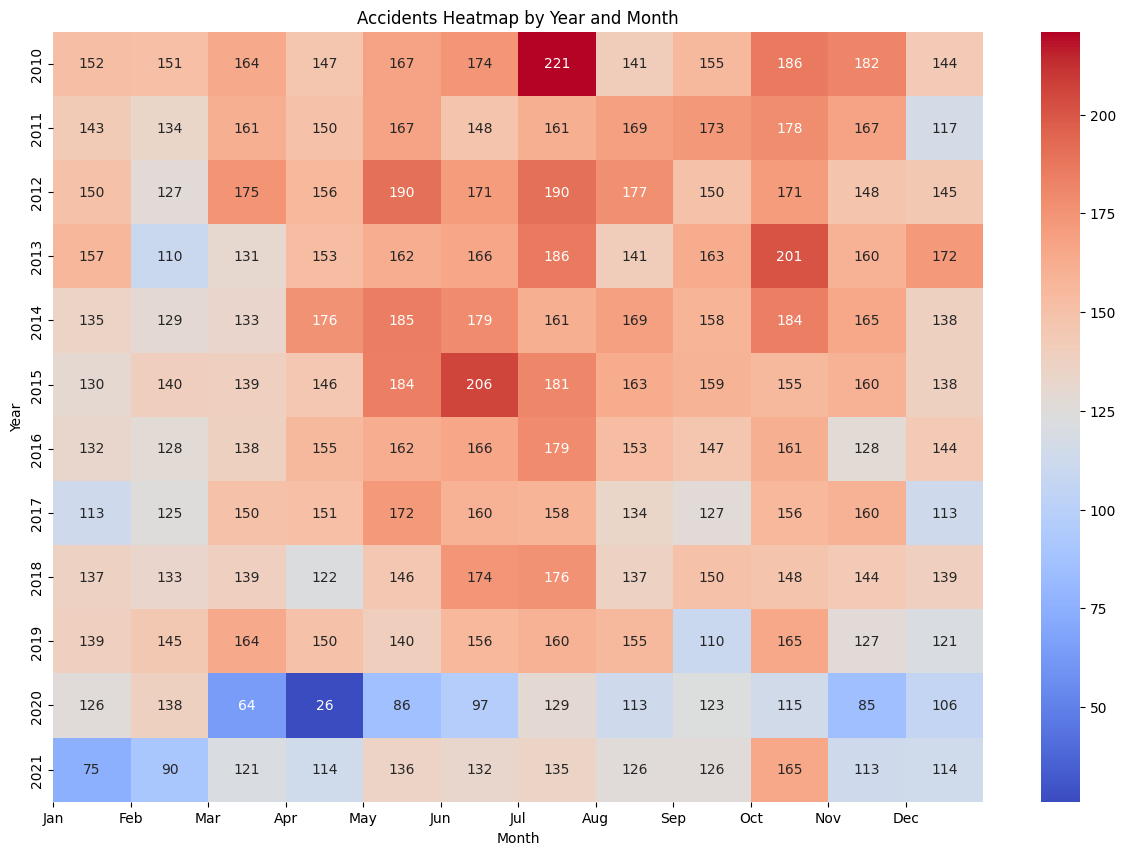

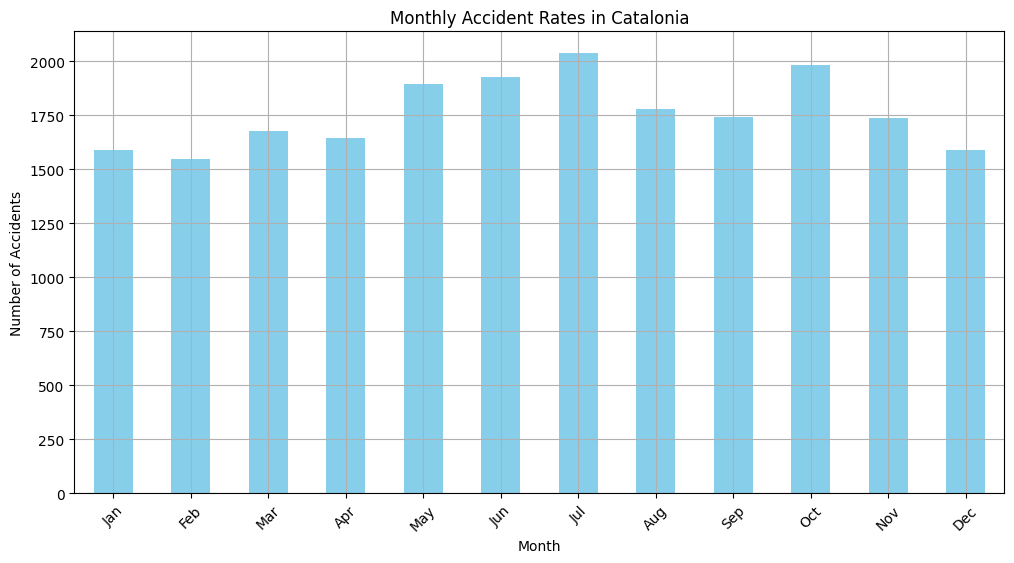

In [107]:
# Temporal Clustering

accident_heatmap_data = data.pivot_table(index='Year', columns='Month', aggfunc='size')

# Adjusting the month labels without using datetime
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Visualization: Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(accident_heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Accidents Heatmap by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(0, 12), labels=month_labels)

plt.show()


# Calculating monthly accident rates (aggregated across all years)
monthly_accidents_count = data.groupby('Month').size()

# Plotting the monthly accident rates
plt.figure(figsize=(12, 6))
monthly_accidents_count.plot(kind='bar', color='skyblue')
plt.title('Monthly Accident Rates in Catalonia')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(0, 12), labels=month_labels, rotation=45)
plt.grid(True)
plt.show()

# Time-Series Forecasting

The ARIMA model was used to forecast the number of traffic accidents for the year 2022. The forecast is based on the historical data from 2010 to 2021.

## Forecast for 2022:
The model predicts approximately *1,368* traffic accidents for the year 2022.
Confidence Interval: The forecast comes with a confidence interval, indicating that the actual number of accidents could be as low as approximately 1,034 or as high as approximately 1,702.


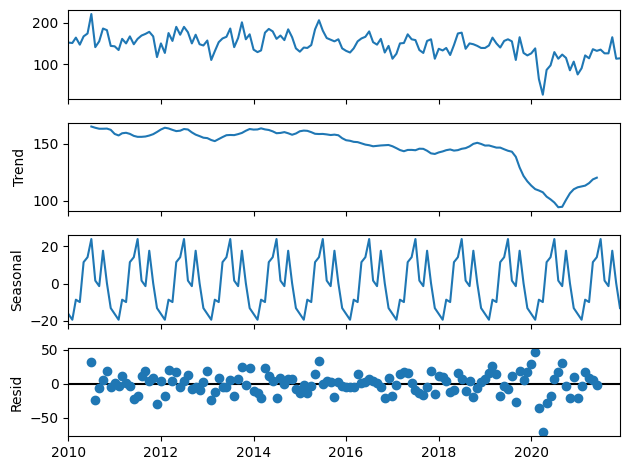

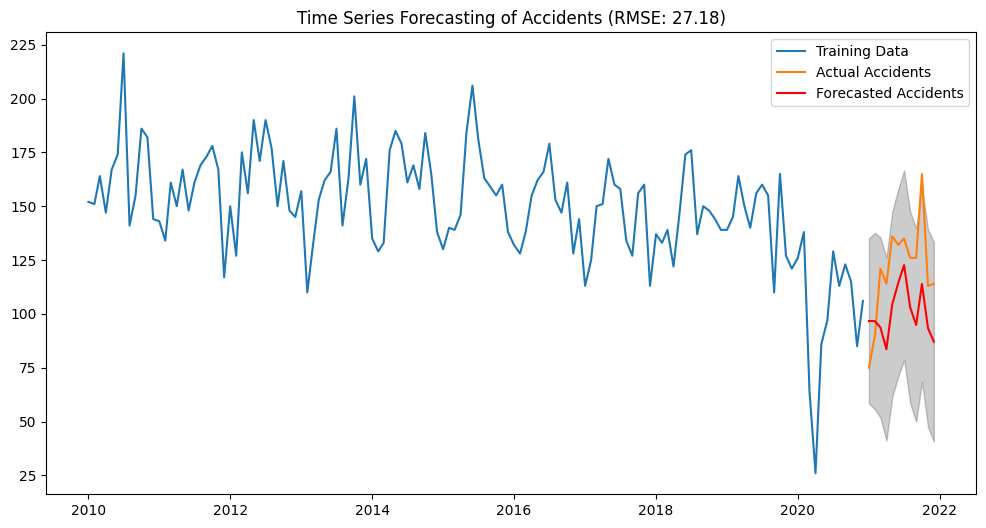

In [110]:
# Time-Series Forecasting
from math import sqrt

# Aggregating the data into a monthly time series for total accidents
monthly_accidents_series = data.groupby(['Year', 'Month']).size()
monthly_accidents_series.index = pd.to_datetime(['{}-{}'.format(y, m) for y, m in monthly_accidents_series.index])
monthly_accidents_series = monthly_accidents_series.asfreq('MS')

# Decomposing the series to understand its components
decomposition = seasonal_decompose(monthly_accidents_series, model='additive')
decomposition.plot()
plt.show()

# Splitting the data into train and test sets
train = monthly_accidents_series.iloc[:-12]  # All data except the last 12 months
test = monthly_accidents_series.iloc[-12:]  # The last 12 months

# SARIMA Model
# Using a general configuration as a starting point
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

# Forecast
forecast = sarima_model_fit.get_forecast(steps=12)
forecast_series = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Calculating RMSE for the forecast
rmse = sqrt(mean_squared_error(test, forecast_series))

# Plotting the forecast against the actual values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Accidents')
plt.plot(forecast_series, label='Forecasted Accidents', color='red')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=.2)
plt.title(f'Time Series Forecasting of Accidents (RMSE: {rmse:.2f})')
plt.legend()
plt.show()

# Conclusion

The data analysis indicates that Catalonia's current road safety measures are effectively steering in the right direction, as evidenced by a noticeable decrease in the number of accidents. Nevertheless, the following insights emerged from the study:

1. **Temporal Trends:** There are distinct seasonal and annual patterns in accident occurrences, with higher incidences in months like June, July, and October. This trend may correlate with tourism peaks, holiday traffic, and weather conditions.

2. **Motorcycle Safety**: The considerable number of motorcycle accidents calls for enhanced safety initiatives, including awareness campaigns and improved infrastructure.mplex modeling and is influenced by various external factors.

3. **Temporal Patterns**: The analysis revealed distinct temporal patterns in accident occurrences, with variations observed both annually and throughout the day. Understanding these patterns is key to implementing time-specific safety measures.

**Recommendations:**

1. **Focused Safety Measures**: Implement targeted road safety measures during peak accident months and promote protective gear usage and safe driving practices, especially for motorcyclists.

2. **Enhanced Safety Campaigns**: Given the increase in accidents during specific months, there's a need for enhanced road safety campaigns during these periods. Awareness should be raised about potential hazards, and drivers should be encouraged to exercise extra caution.

3. **Infrastructure Improvement:** Focus on road safety improvements in high-risk months and areas with frequent accidents.

4. **Data-Driven Policy Making:** Utilize data insights for traffic management and policy development, particularly in tourist-heavy periods.


By addressing these areas, significant strides can be made in enhancing road safety in Catalonia, ultimately leading to a reduction in traffic accidents and the associated human and economic costs.